# Librerias

In [1]:
import numpy as np
from  cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# Lectura de imagen a color

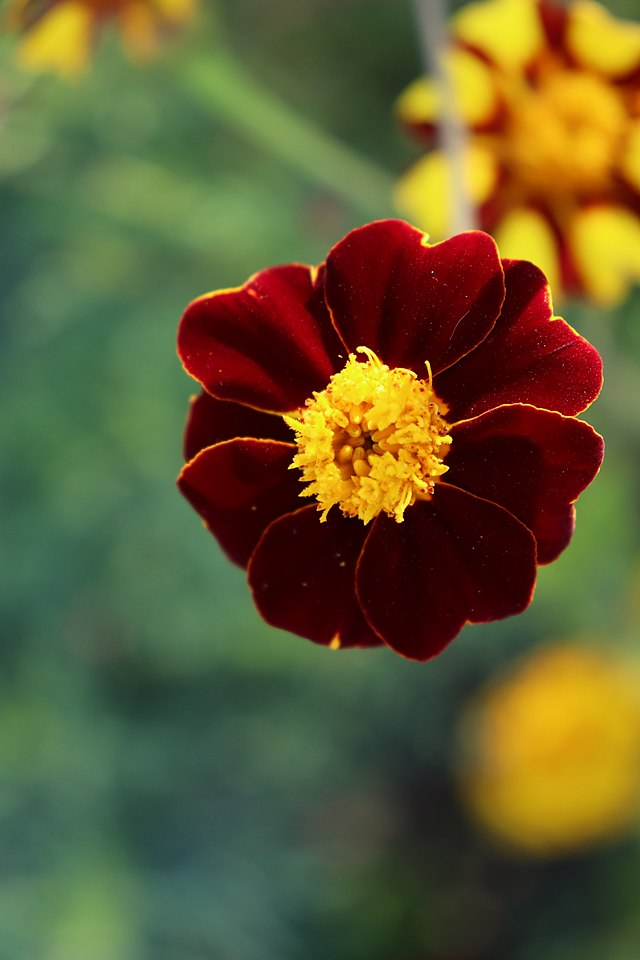

size =  (960, 640, 3)
max  =  255
min  =  0


In [3]:
Icv = imread('Flor.jpg')      # lectura en formato opencv (BGR)
cv2_imshow(Icv)
howis(Icv)

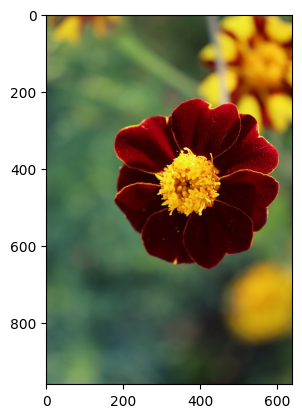

In [4]:
I = Icv[:,:,[2,1,0]]             # conversion a formato estándar (RGB)
plt.imshow(I)
plt.show()

# Canales de color

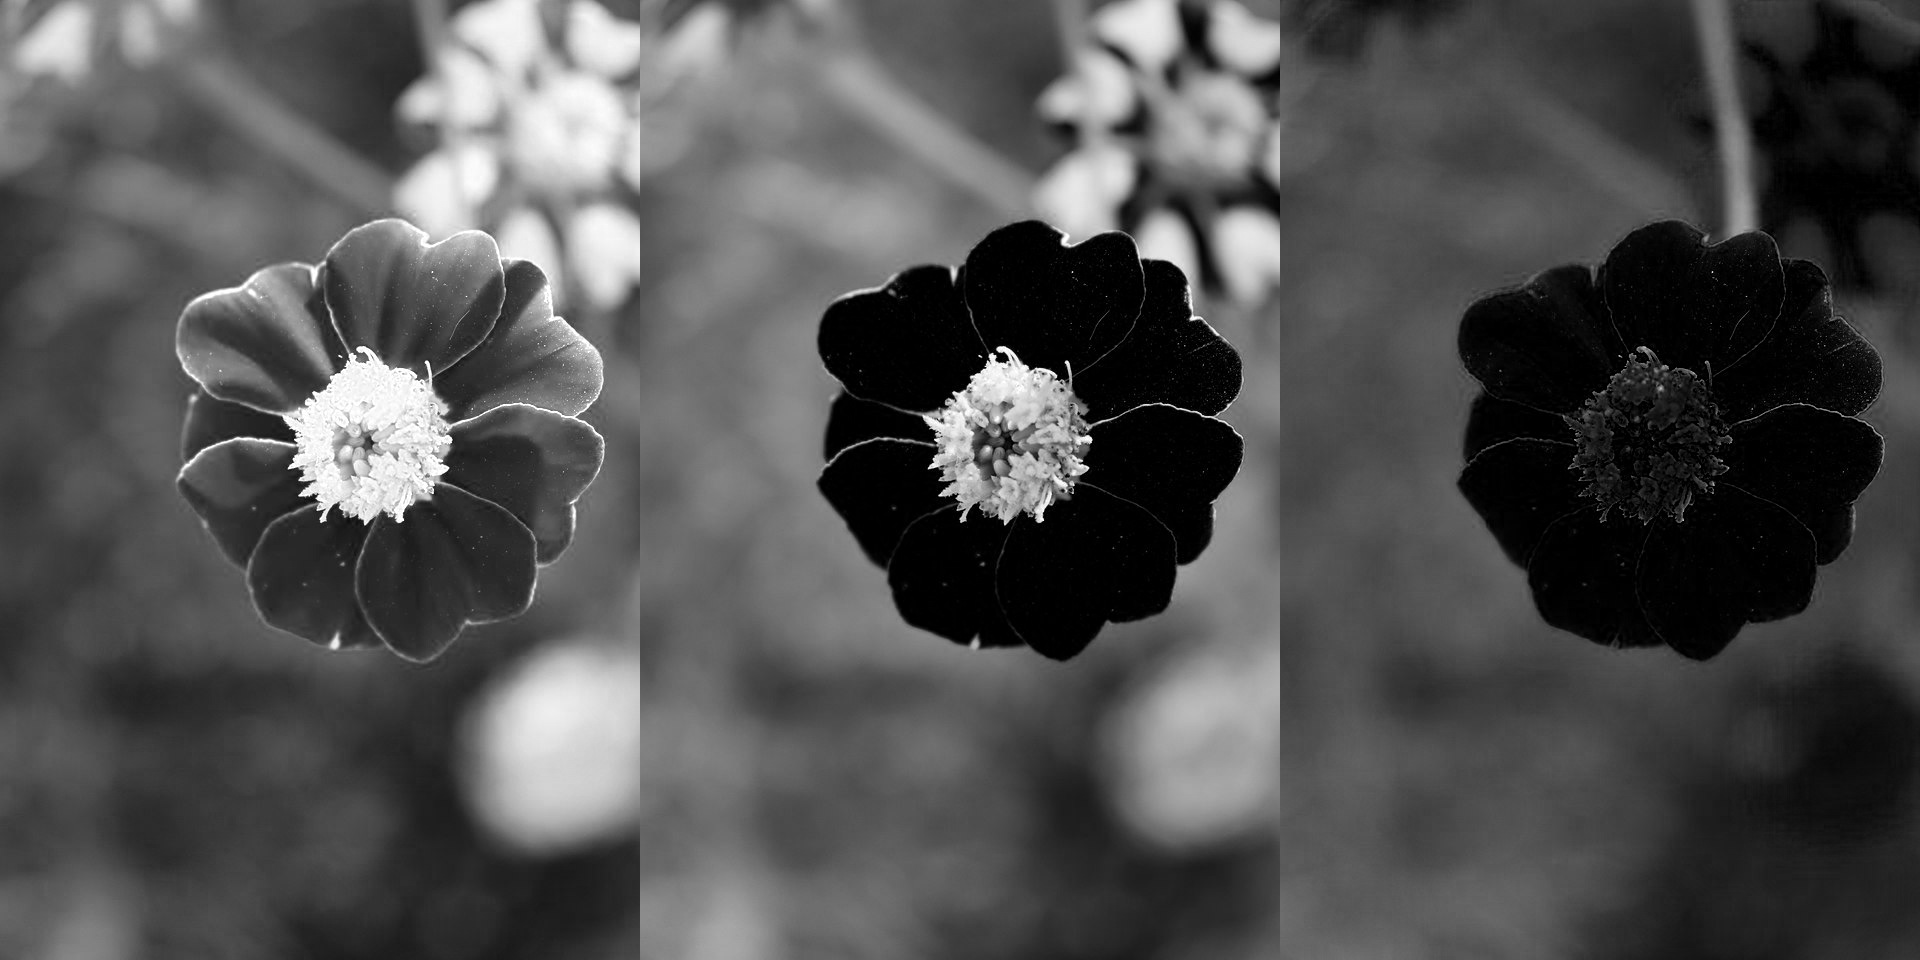

In [5]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
cv2_imshow(RGB)

# Conversion a blanco y negro (tonos de gris)

size =  (960, 640)
max  =  223
min  =  1


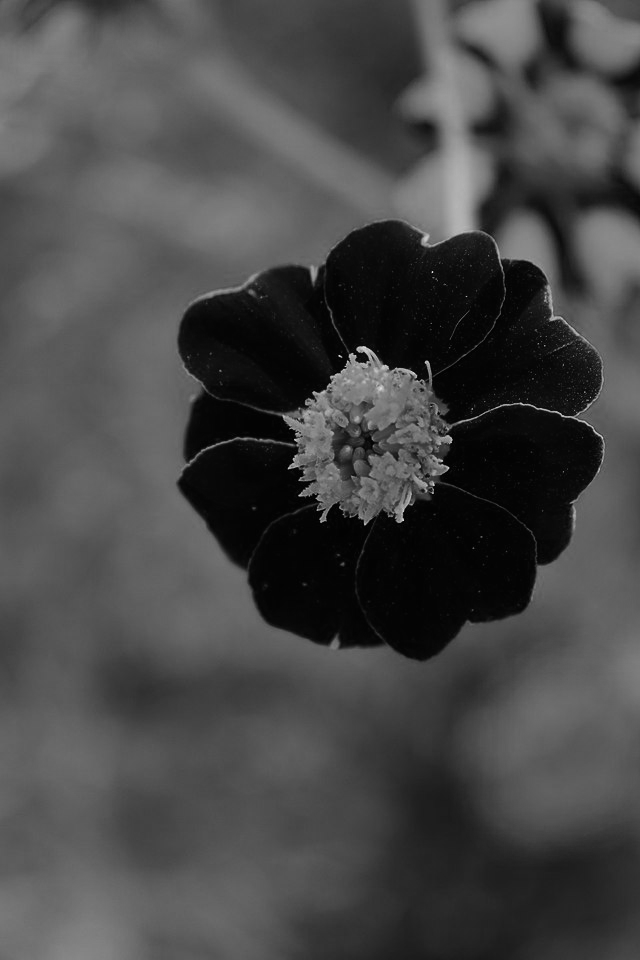

In [6]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
#k  = (1/3,1/3,1/3)
k  = (0.1,0.4,0.5)
Zd = k[0]*Rd+k[1]*Gd+k[2]*Bd
Z  = Zd.astype(int)
howis(Z)
cv2_imshow(Z)

# Segmentación de la Flor Roja

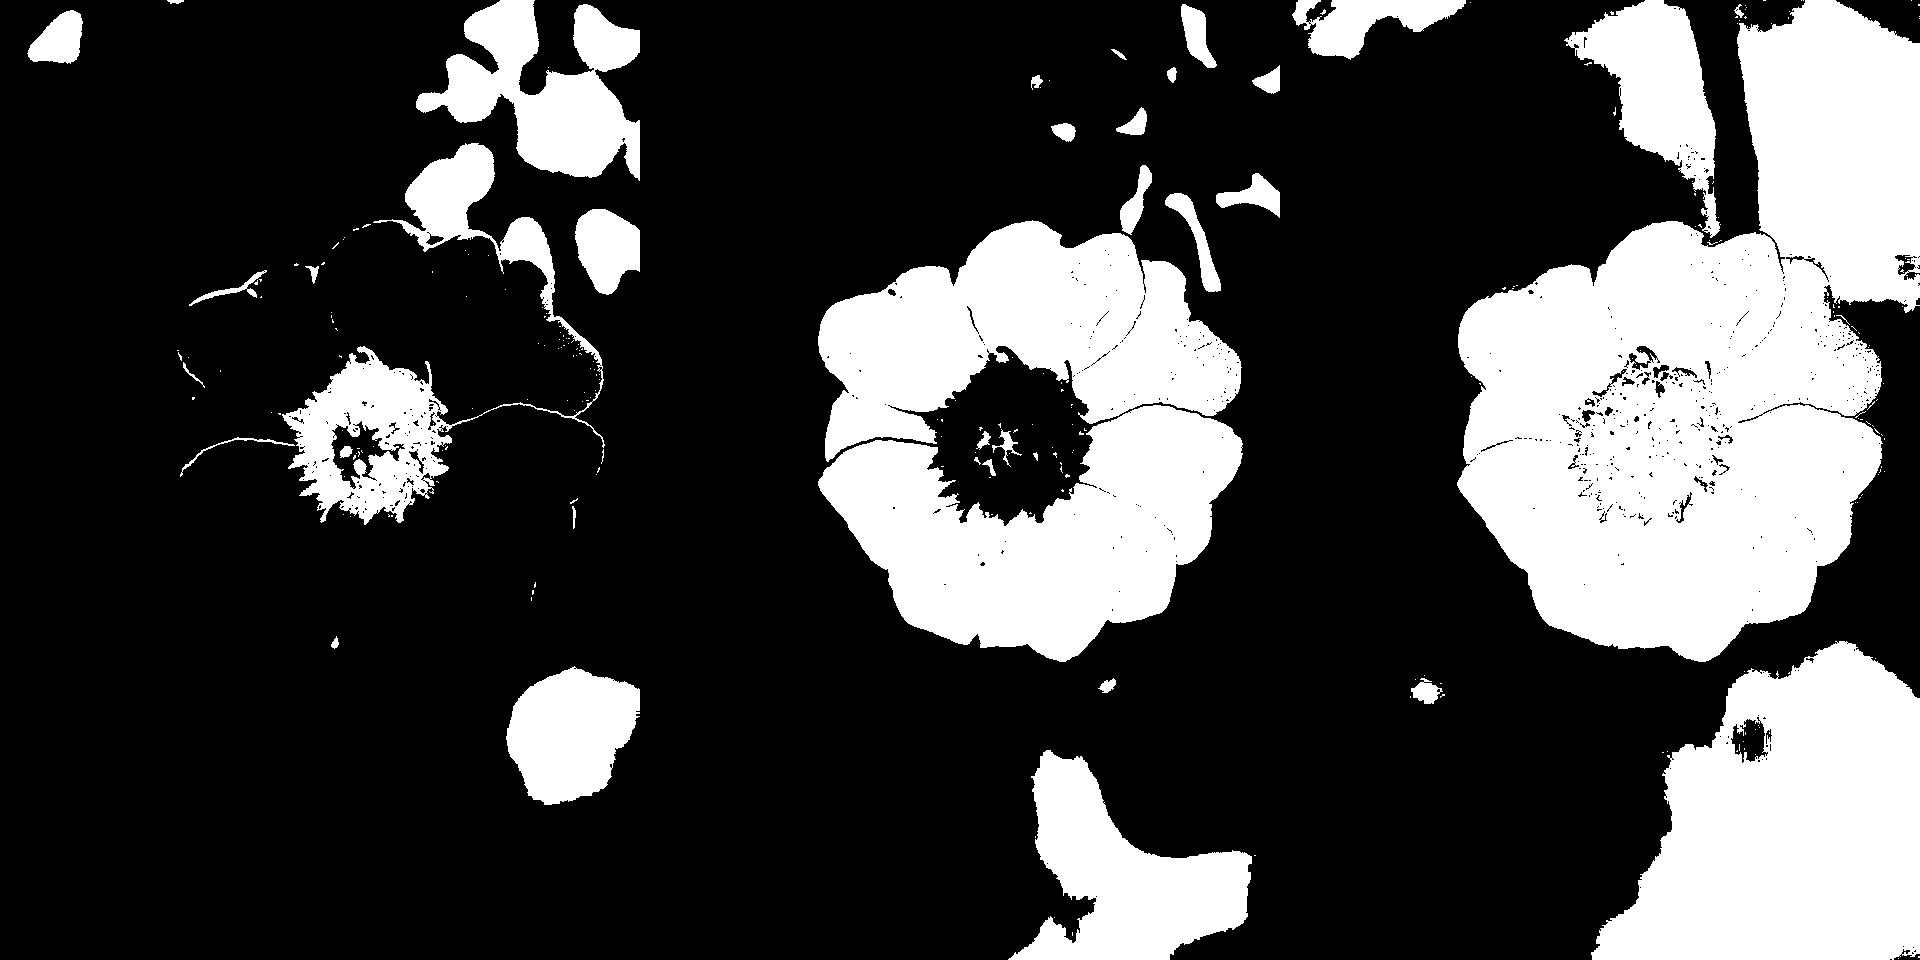

In [28]:
Sr = R>200
Sg = G<50
Sb = B<50
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
cv2_imshow(Srgb*255)

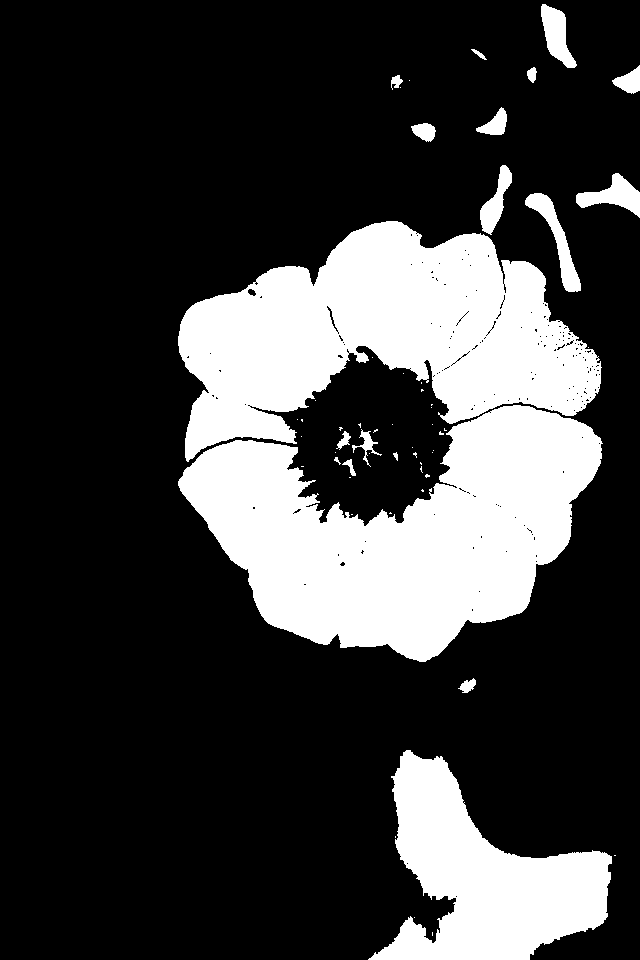

In [29]:
S = np.logical_and(Sg,Sb)
cv2_imshow(S*255)

# Eliminación de filas con pocos unos

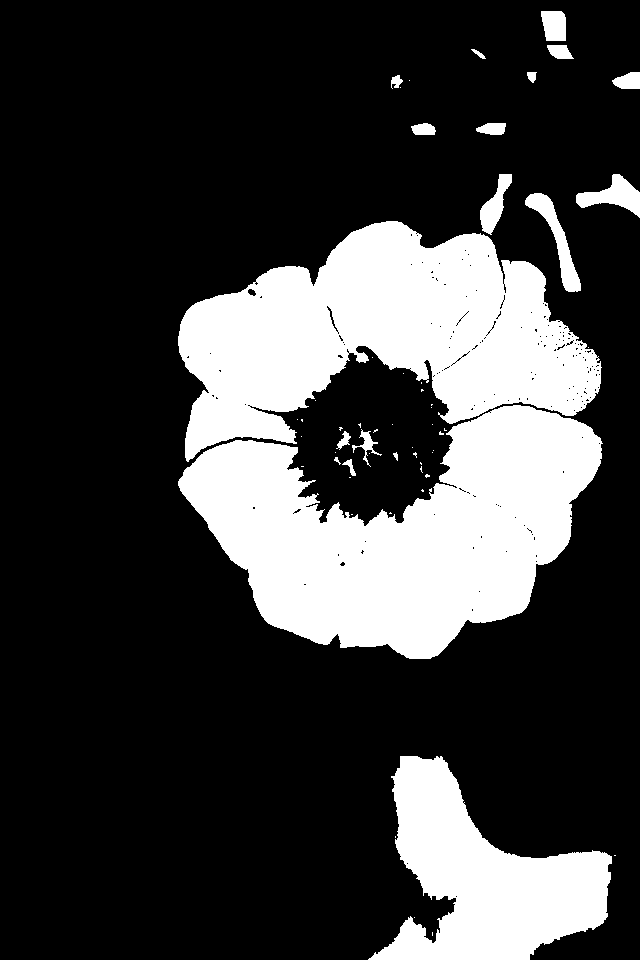

In [30]:
(N,M) = S.shape
Q = S
for i in range(N):
  s = np.sum(S[i,:])
  if s<20:
    Q[i,:] = 0
cv2_imshow(Q*255)

# Búsqueda de (imin,jmin) y (imax,jmax) en la región segmetada

In [31]:
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if Q[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

# Gráfica de Bounding Box

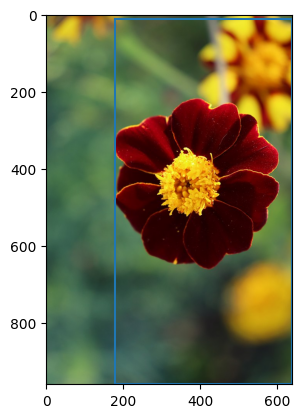

In [32]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y)
plt.show()



# Detección de Bordes

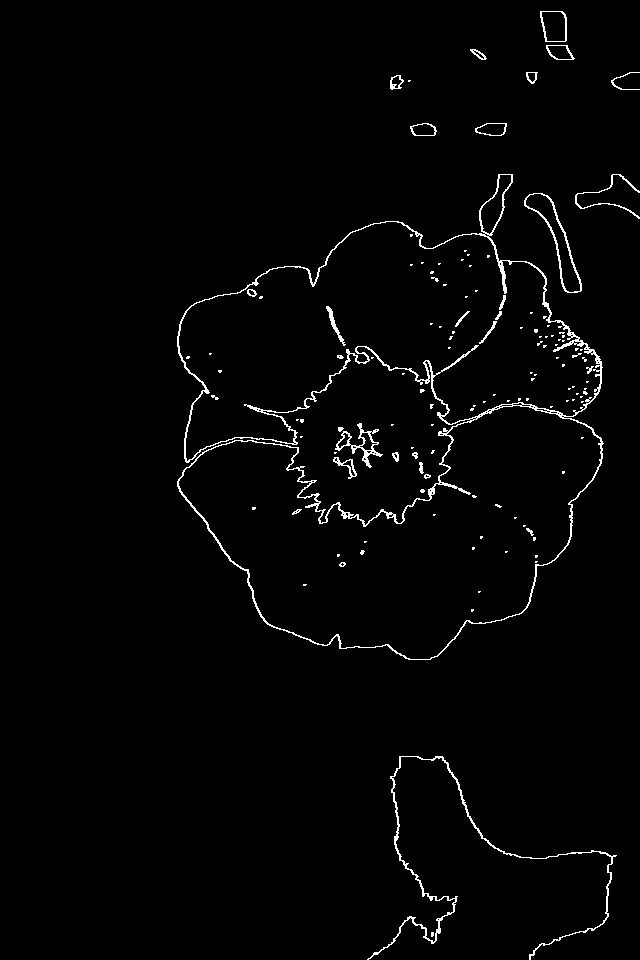

In [33]:
E = np.zeros((N,M),np.uint8)
for i in range(N):
  for j in range(1,M):
    if Q[i,j]!=Q[i,j-1]:
      E[i,j]   = 1
      E[i,j-1] = 1
for i in range(1,N):
  for j in range(M):
    if Q[i-1,j]!=Q[i,j]:
      E[i,j]   = 1
      E[i,j-1] = 1
cv2_imshow(E*255)


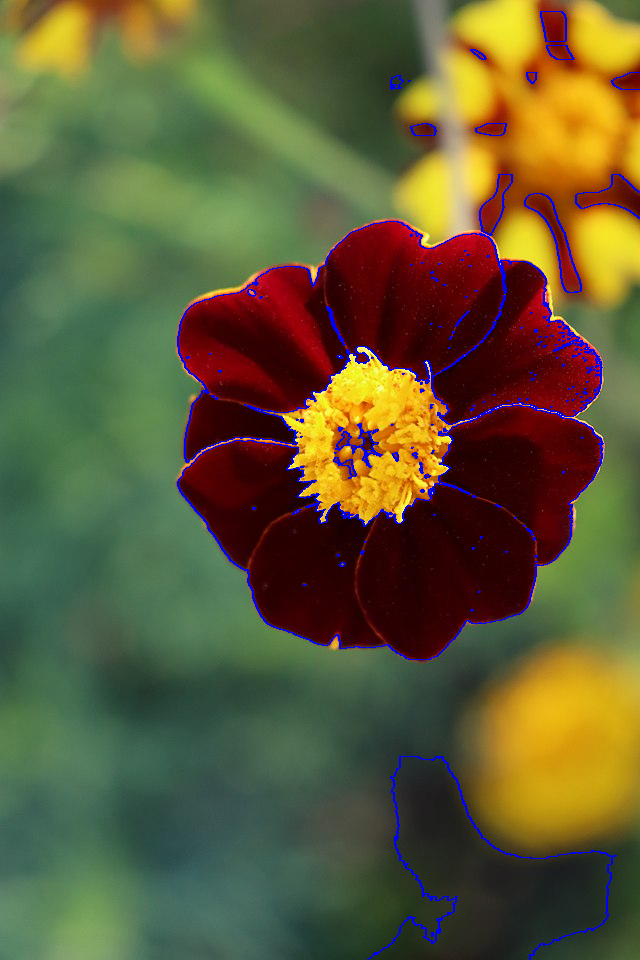

In [34]:
for i in range(N):
  for j in range(M):
    if E[i,j]==1:
      Icv[i,j,:] = [255,0,0]
cv2_imshow(Icv)